In [9]:
import pandas as pd 

df = pd.read_csv('/Users/osmar/Documents/Projects /MachineLearning/SeoulBikeData.csv', encoding='latin1')
df.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

El dataframe tiene 14 columnas 

Con 8760 entradas existen columnas categoricas y columnas numericas, hay variables con la metrica de las unidades

Veamos las variables por tipo de variable en este caso se pueden ver que hay:

object, float64, int64

Algunas como Date es necesario sean cambiadas a formato de fecha datetime64

In [14]:
cat_columns = df.select_dtypes(include=['object']).columns.to_list()
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

print("Categorical columns:", cat_columns)
print("Numerical columns:", num_columns)

#Conversion de la variable date -> datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

date_columns = df.select_dtypes(include=['datetime64']).columns.to_list()
print("Date columns:", date_columns)

Categorical columns: ['Seasons', 'Holiday', 'Functioning Day']
Numerical columns: ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
Date columns: ['Date']


## Analisis Variables Numericas Univariado

In [15]:
df[num_columns].describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

La renta promedio de bicicletas es de ~645 pero teniendo percentiles o valores maximos cercanos a 3000. Por otro lado, se observan que dentro de las rentas de bicicletas temperaturas por debajo de los 0 grados. 



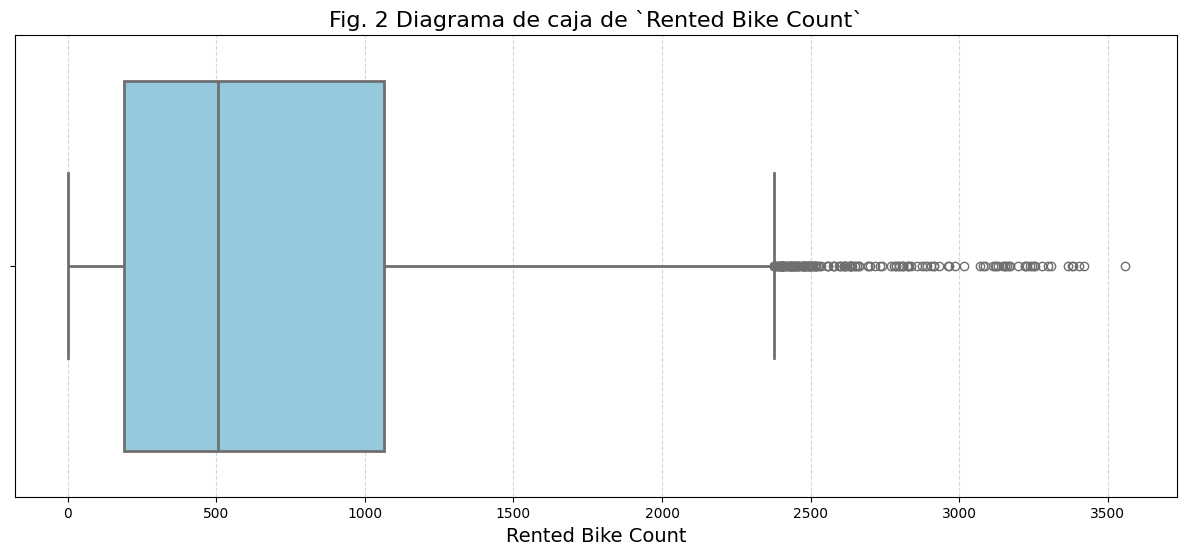

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.boxplot(
        x=df["Rented Bike Count"],
        color='skyblue',
        showfliers=True,
        linewidth=2
)
plt.title('Fig. 2 Diagrama de caja de `Rented Bike Count`', fontsize=16)
plt.xlabel('Rented Bike Count', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

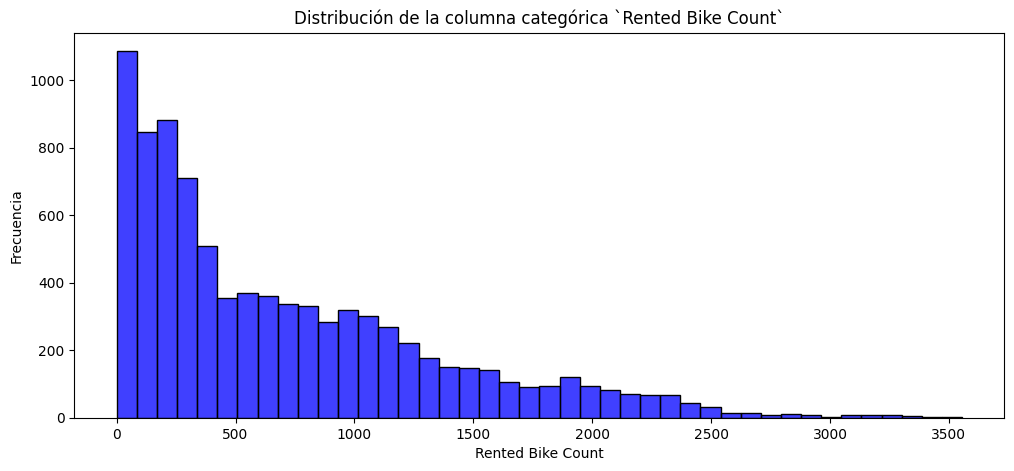

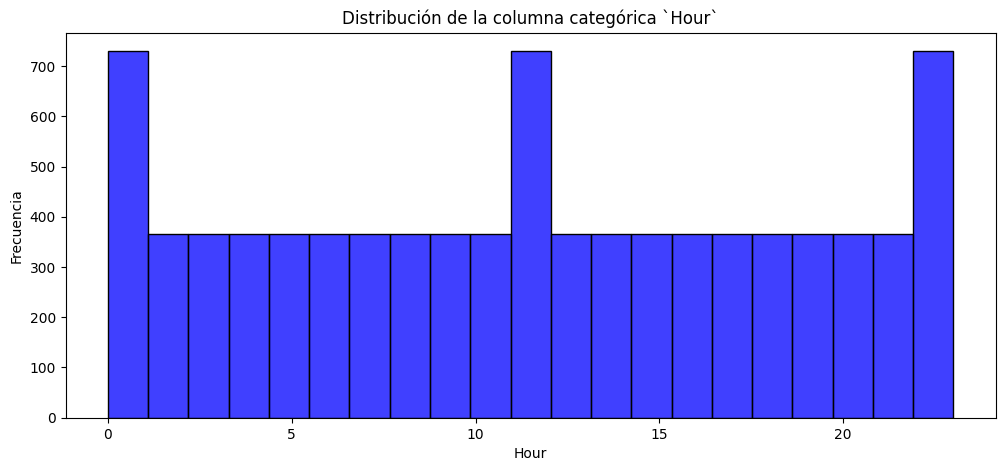

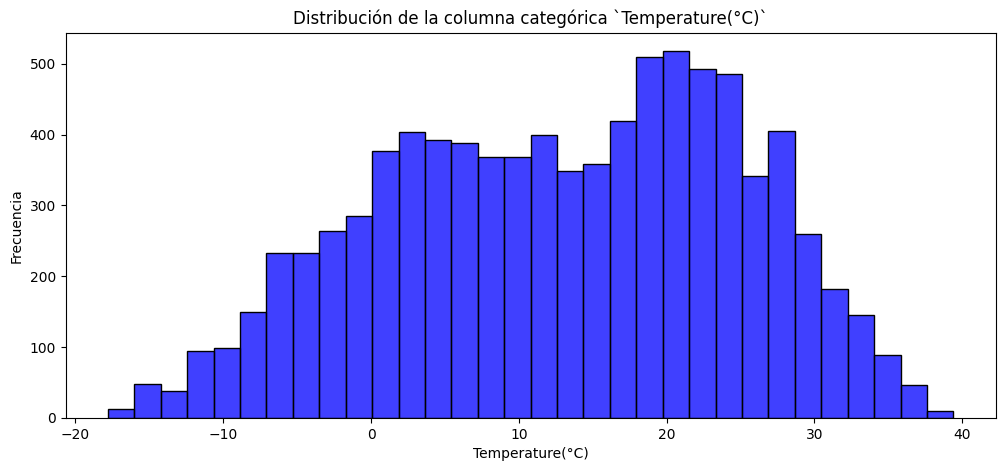

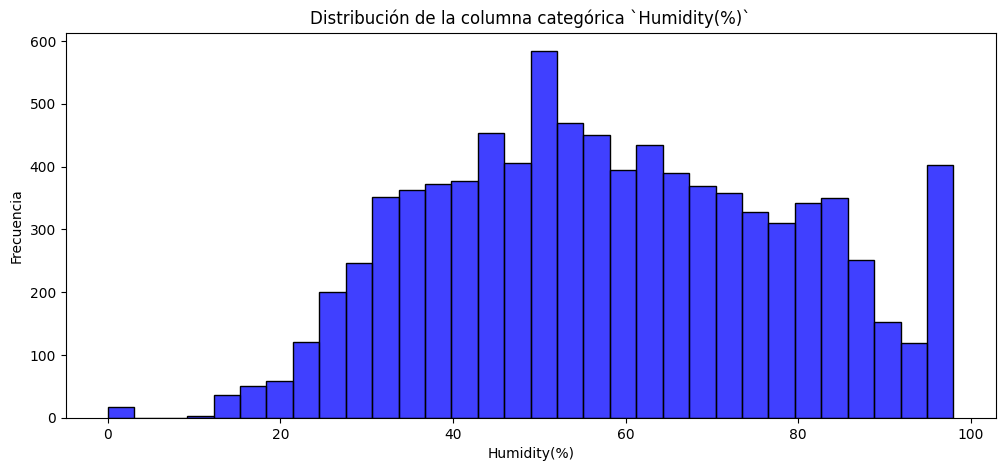

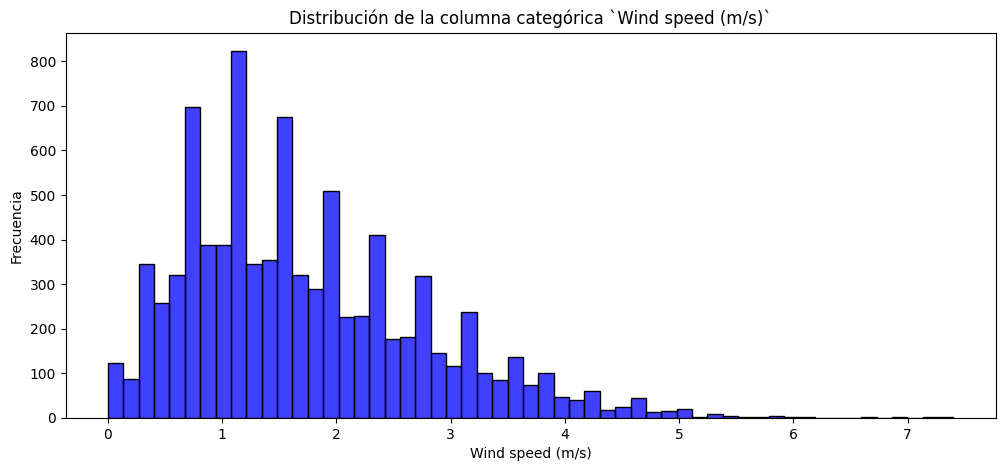

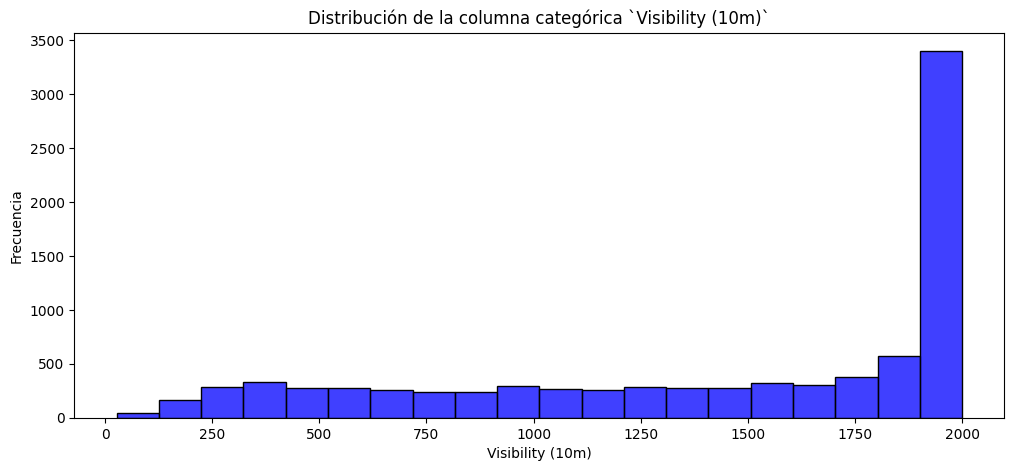

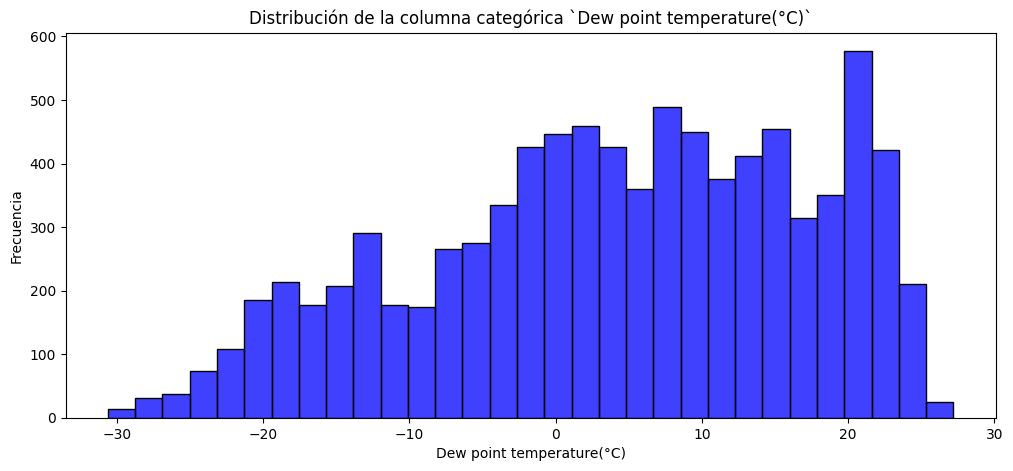

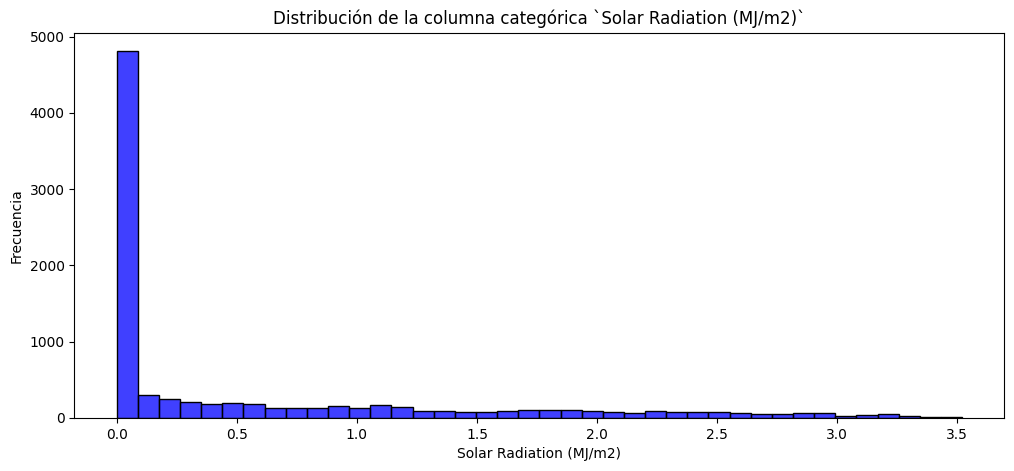

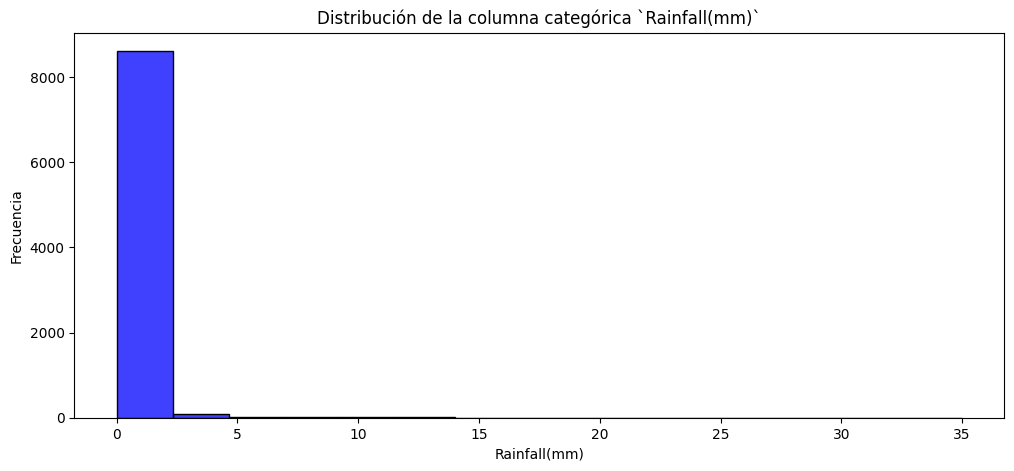

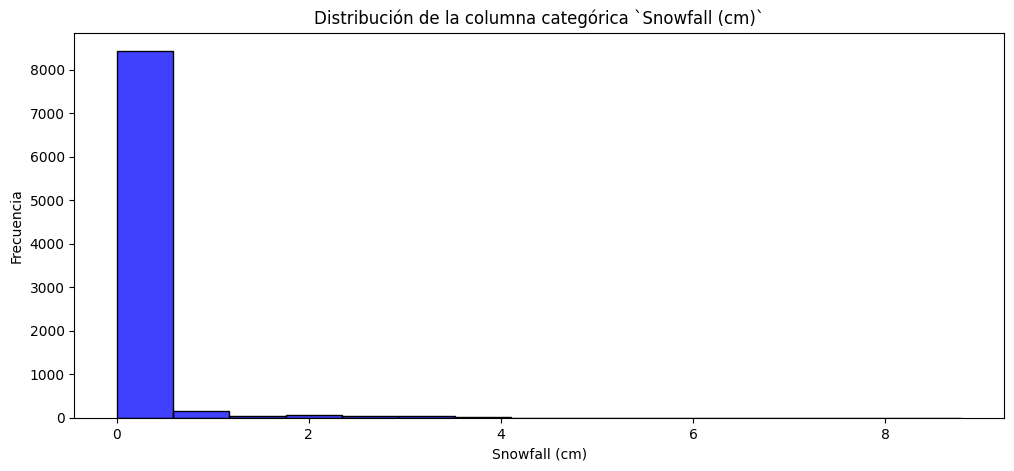

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_columns:
    plt.figure(figsize=(12,5))
    sns.histplot(
        data=df,
        x=col,
        kde=False,
        color='blue'
    )
    plt.title(f'Distribución de la columna categórica `{col}`')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

Podemos ver que la renta de bicicletas tiene una distribución muy centrada en valores entre 0-600. Con valores atipicos pasando de este rango, es necesario ver si el aumento de la renta de bicicletas se debe a alguna otra caracteristica como el clima o algun otro valor que pueda influir en el aumento de la renta de bicletas. Pero antes de analizar estos cambios a traves del tiempo veamos algunas otras columnas numericas 

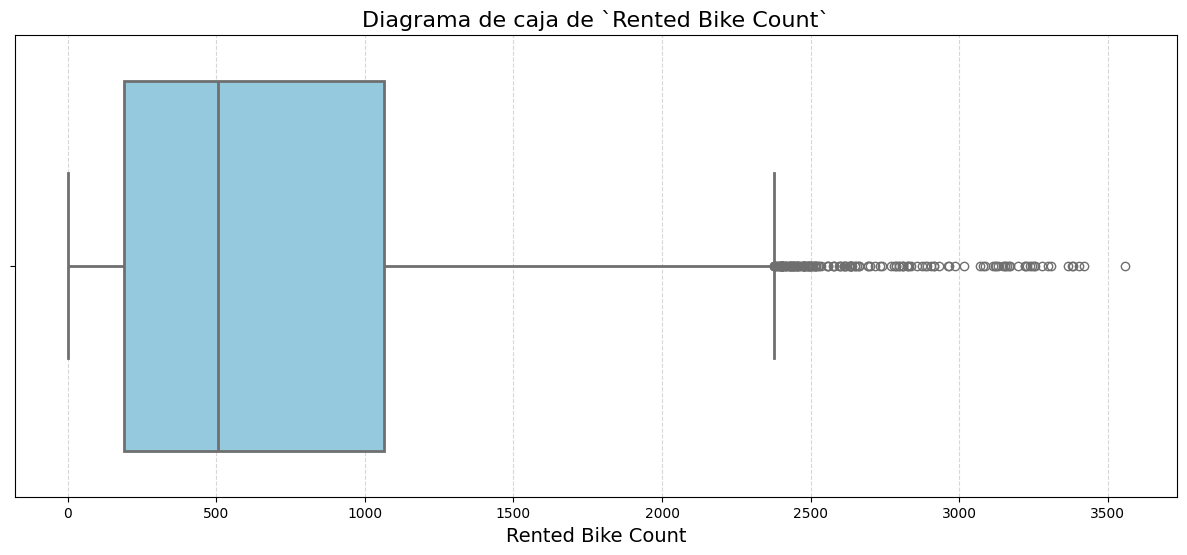

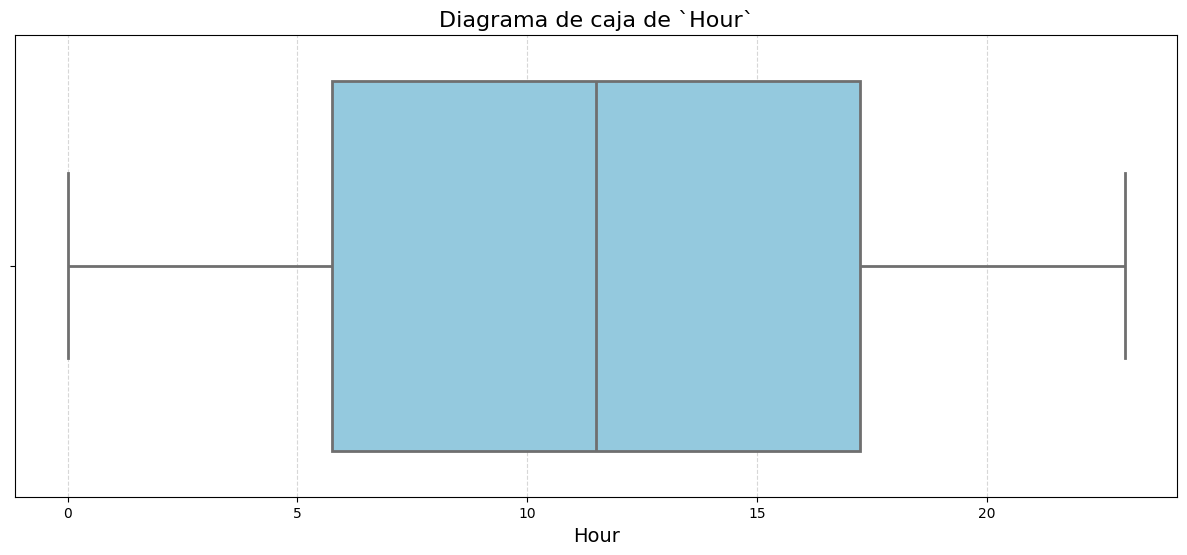

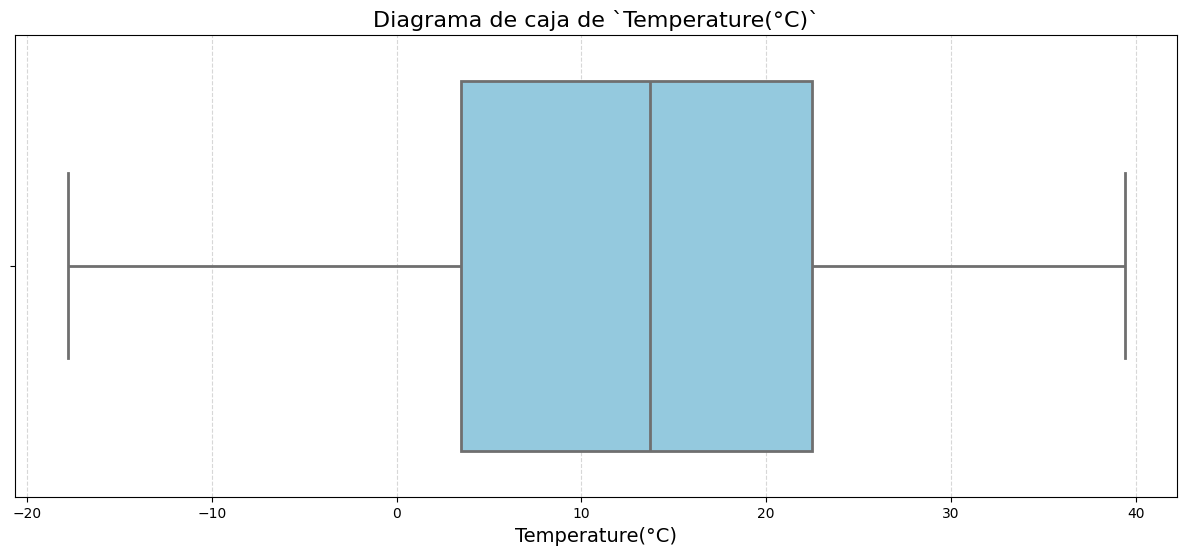

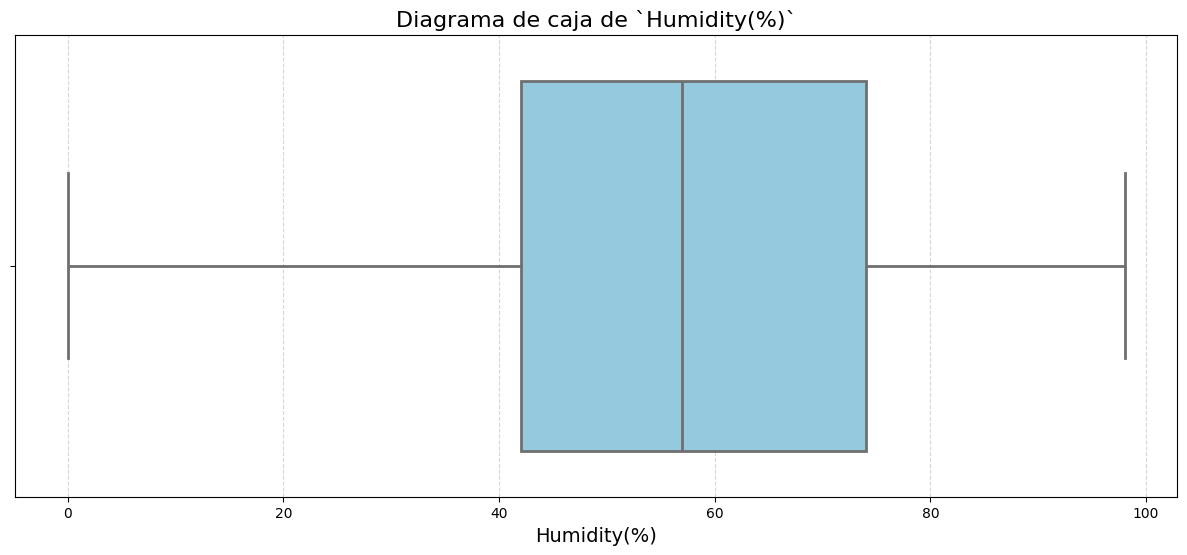

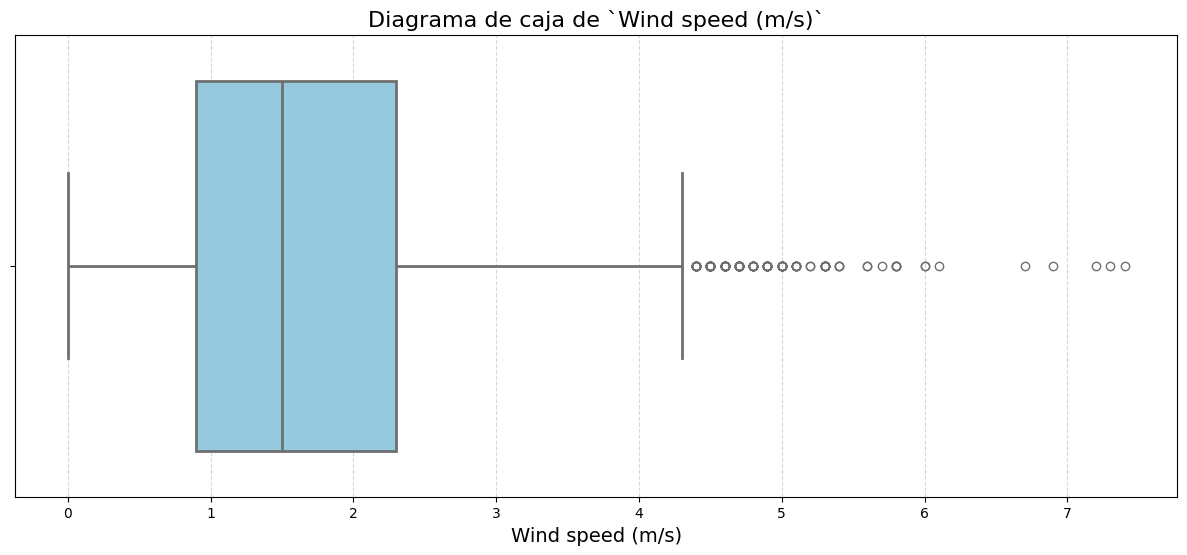

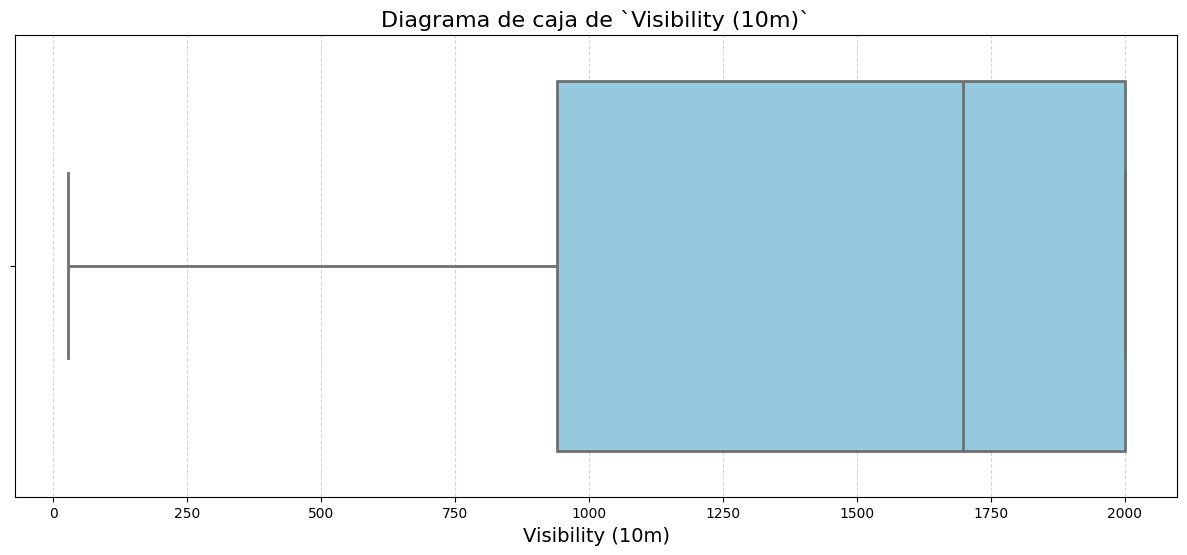

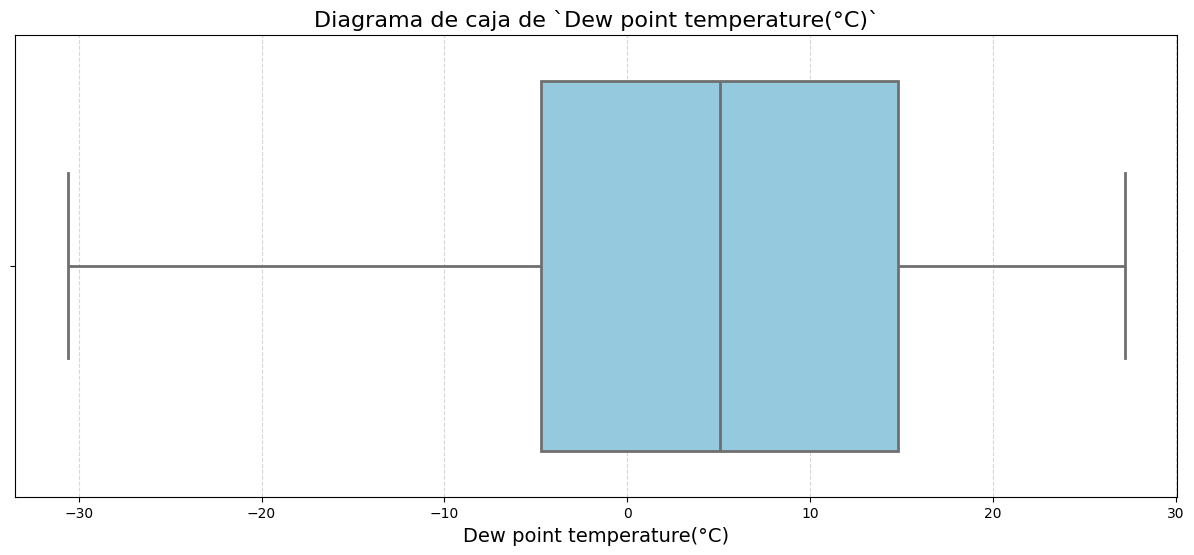

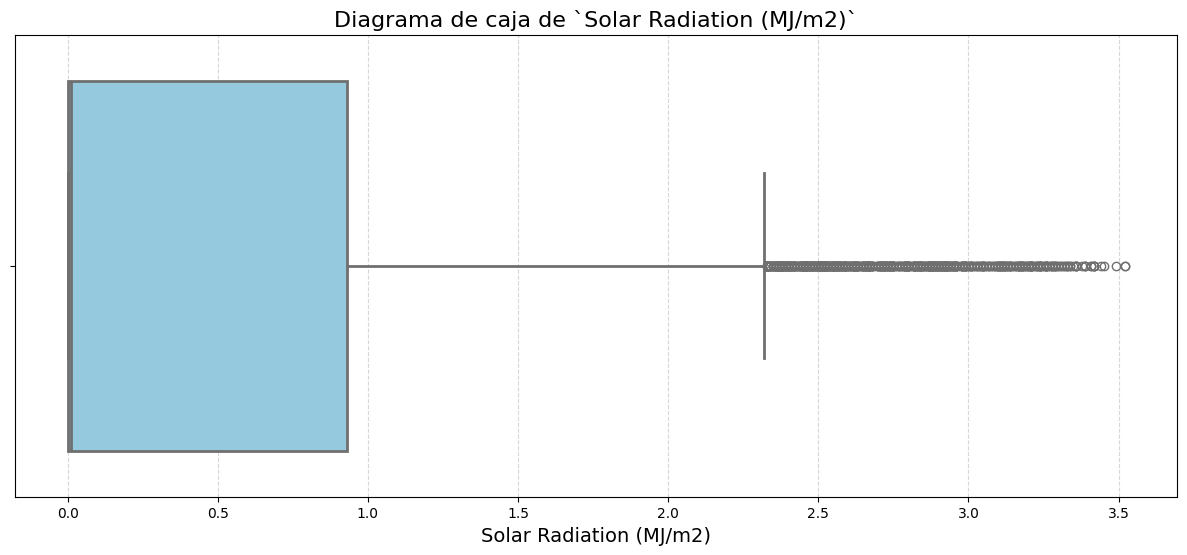

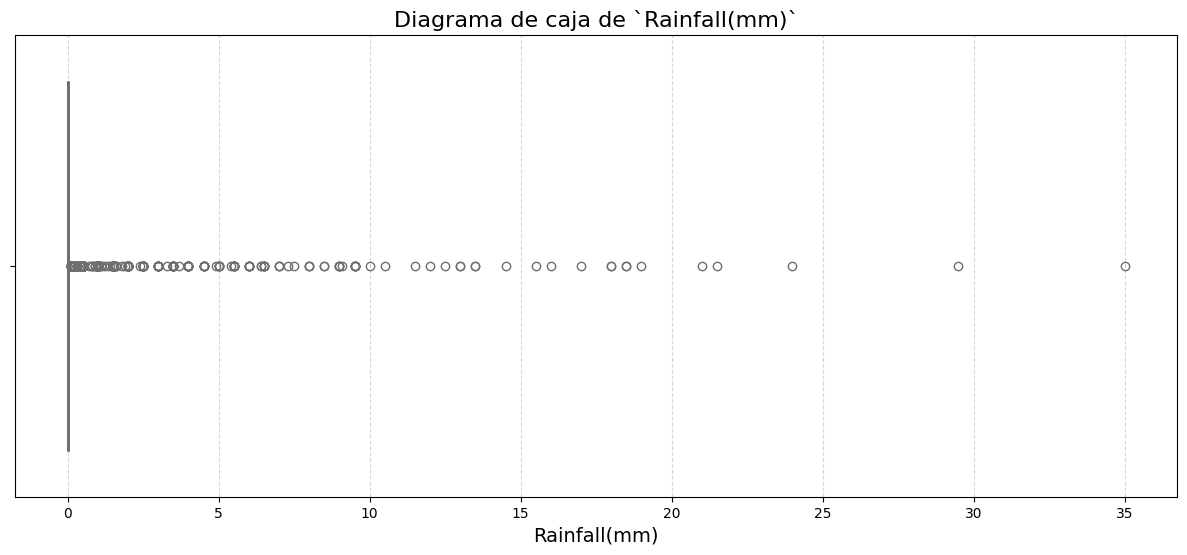

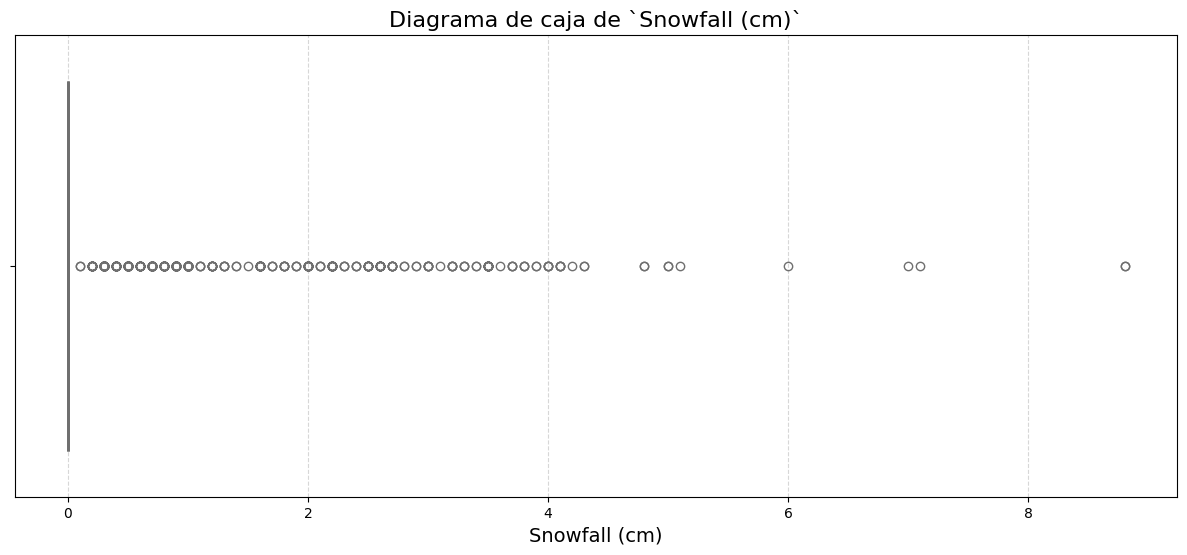

In [19]:
for col in num_columns:
        plt.figure(figsize=(15,6))
        sns.boxplot(
                x=df[col],
                color='skyblue',
                showfliers=True,
                linewidth=2
        )
        plt.title(f'Diagrama de caja de `{col}`', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.5)
        plt.show()

## Analisis Con Serires de Tiempo 

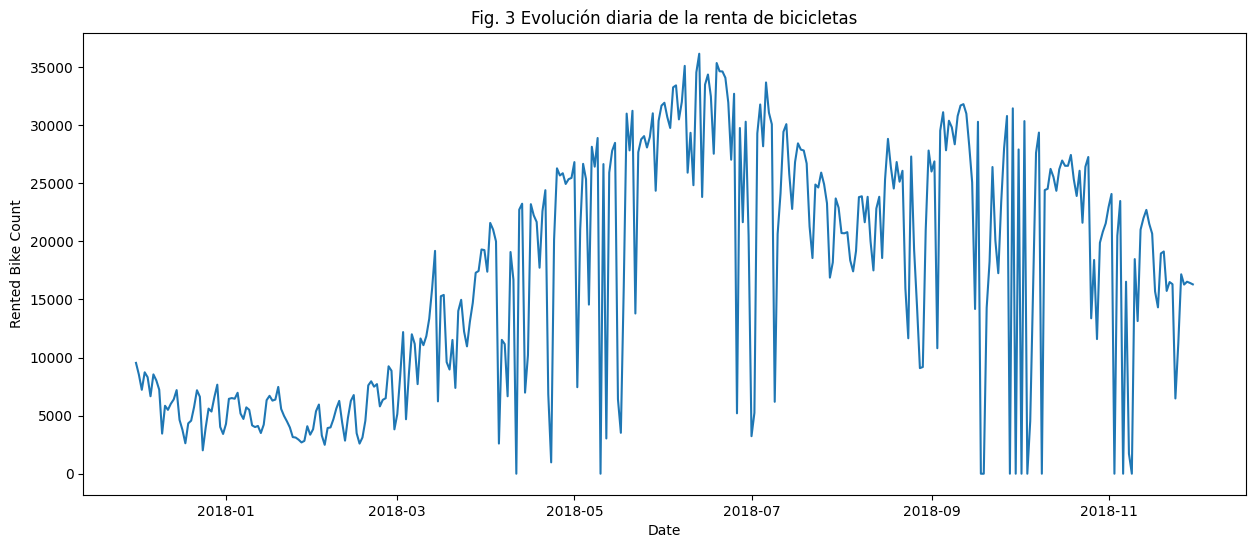

In [20]:
# Calcula los valores de renta de bicicletas agrupados por día
temp_data = df.groupby('Date')['Rented Bike Count'].sum().reset_index()

# Especifica el tamaño de la figura
plt.figure(figsize=(15,6))

sns.lineplot(
    x="Date",
    y="Rented Bike Count",
    data=temp_data
).set(
    title='Fig. 3 Evolución diaria de la renta de bicicletas'
)

plt.show()


## Analisis Categorico Univariante 

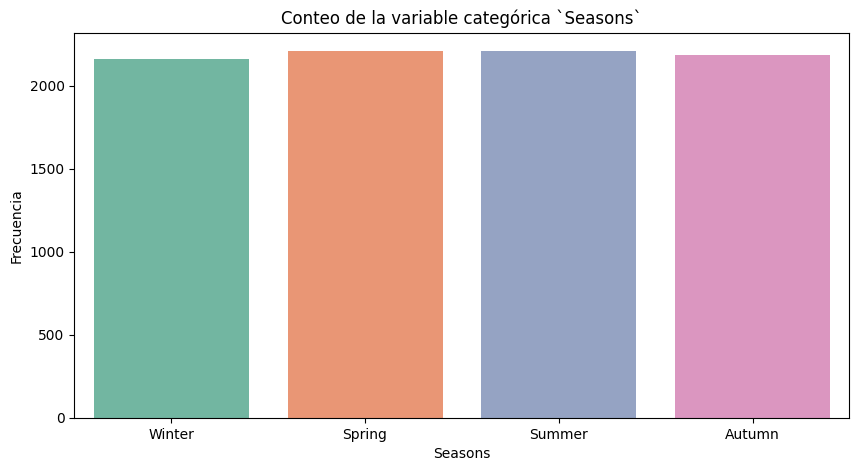

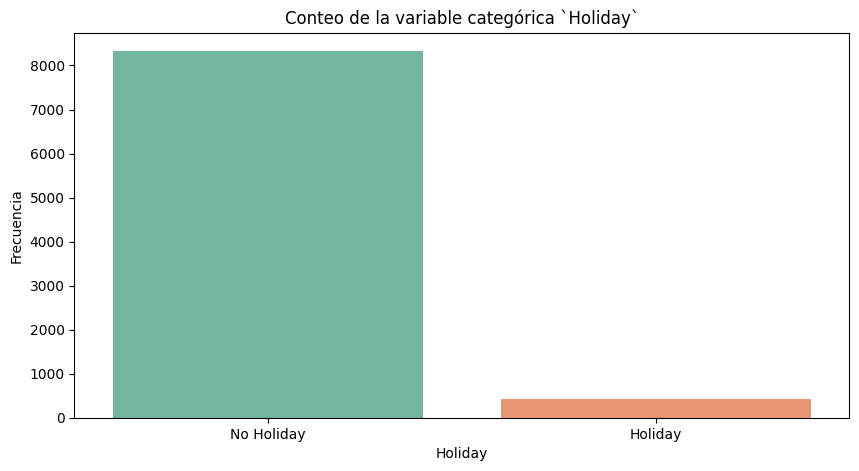

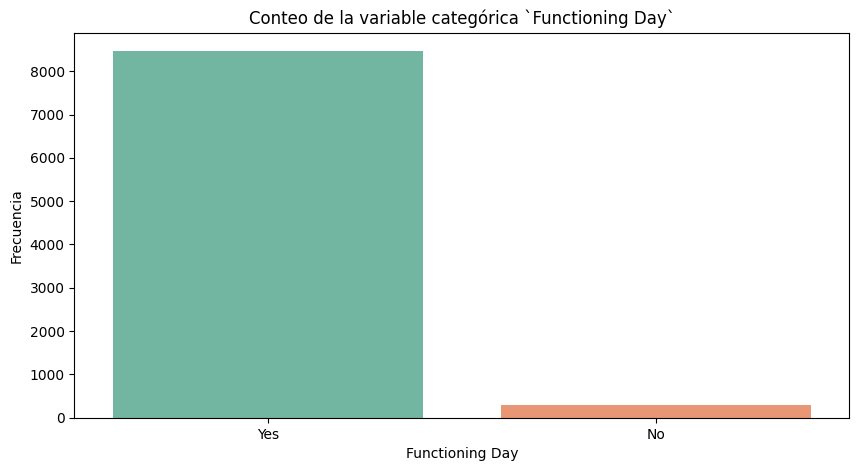

In [24]:
for col in cat_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, palette='Set2', hue=col)
    plt.title(f'Conteo de la variable categórica `{col}`')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

Observaciones principales
- La distribución de rentas muestra comportamientos similares entre las diferentes estaciones (Seasons).  
- Hay muchos más registros etiquetados como "No Holiday" que como "Holiday": la mayoría de los días no son feriados.  
- La variable "Functioning Day" indica que la estación está funcionando en la mayoría de los registros; los días sin funcionamiento son escasos.

Interpretación didáctica
- Estas observaciones sugieren que, en términos agregados, la estacionalidad no produce cambios drásticos en la forma de la distribución de rentas, pero podría afectar la magnitud (media/mediana).
- La baja cantidad de feriados y de días no operativos implica que su efecto sobre la serie temporal total puede ser limitado en frecuencia, aunque su impacto puntual puede ser relevante.


/var/folders/pp/6w_pdqds3ls73j2rklp85mc80000gn/T/ipykernel_27642/3798930226.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Seasons')


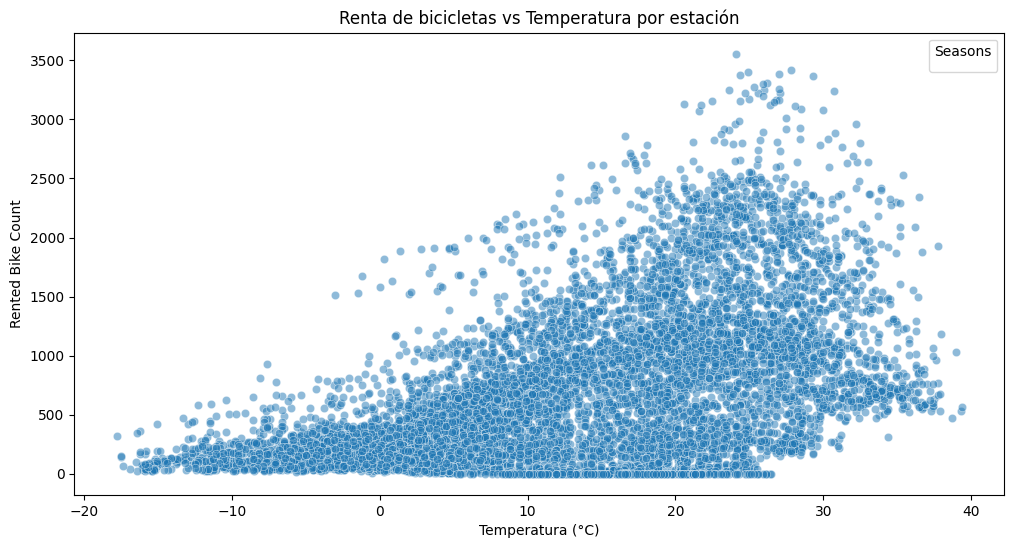

In [26]:
# Scatterplot entre Temperature(°C) y Rented Bike Count
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='Temperature(°C)',
    y='Rented Bike Count',
    alpha=0.5
)
plt.title('Renta de bicicletas vs Temperatura por estación')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Rented Bike Count')
plt.legend(title='Seasons')
plt.show()

/var/folders/pp/6w_pdqds3ls73j2rklp85mc80000gn/T/ipykernel_27642/1764002995.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Seasons')


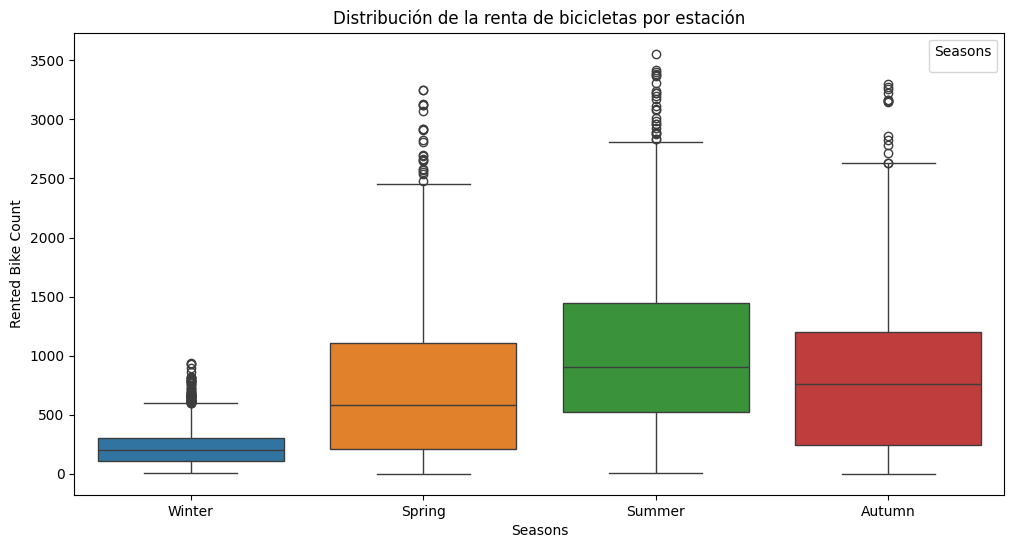

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, 
            x='Seasons', 
            y='Rented Bike Count',
            hue='Seasons'
)
plt.title('Distribución de la renta de bicicletas por estación')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.legend(title='Seasons')
plt.show()

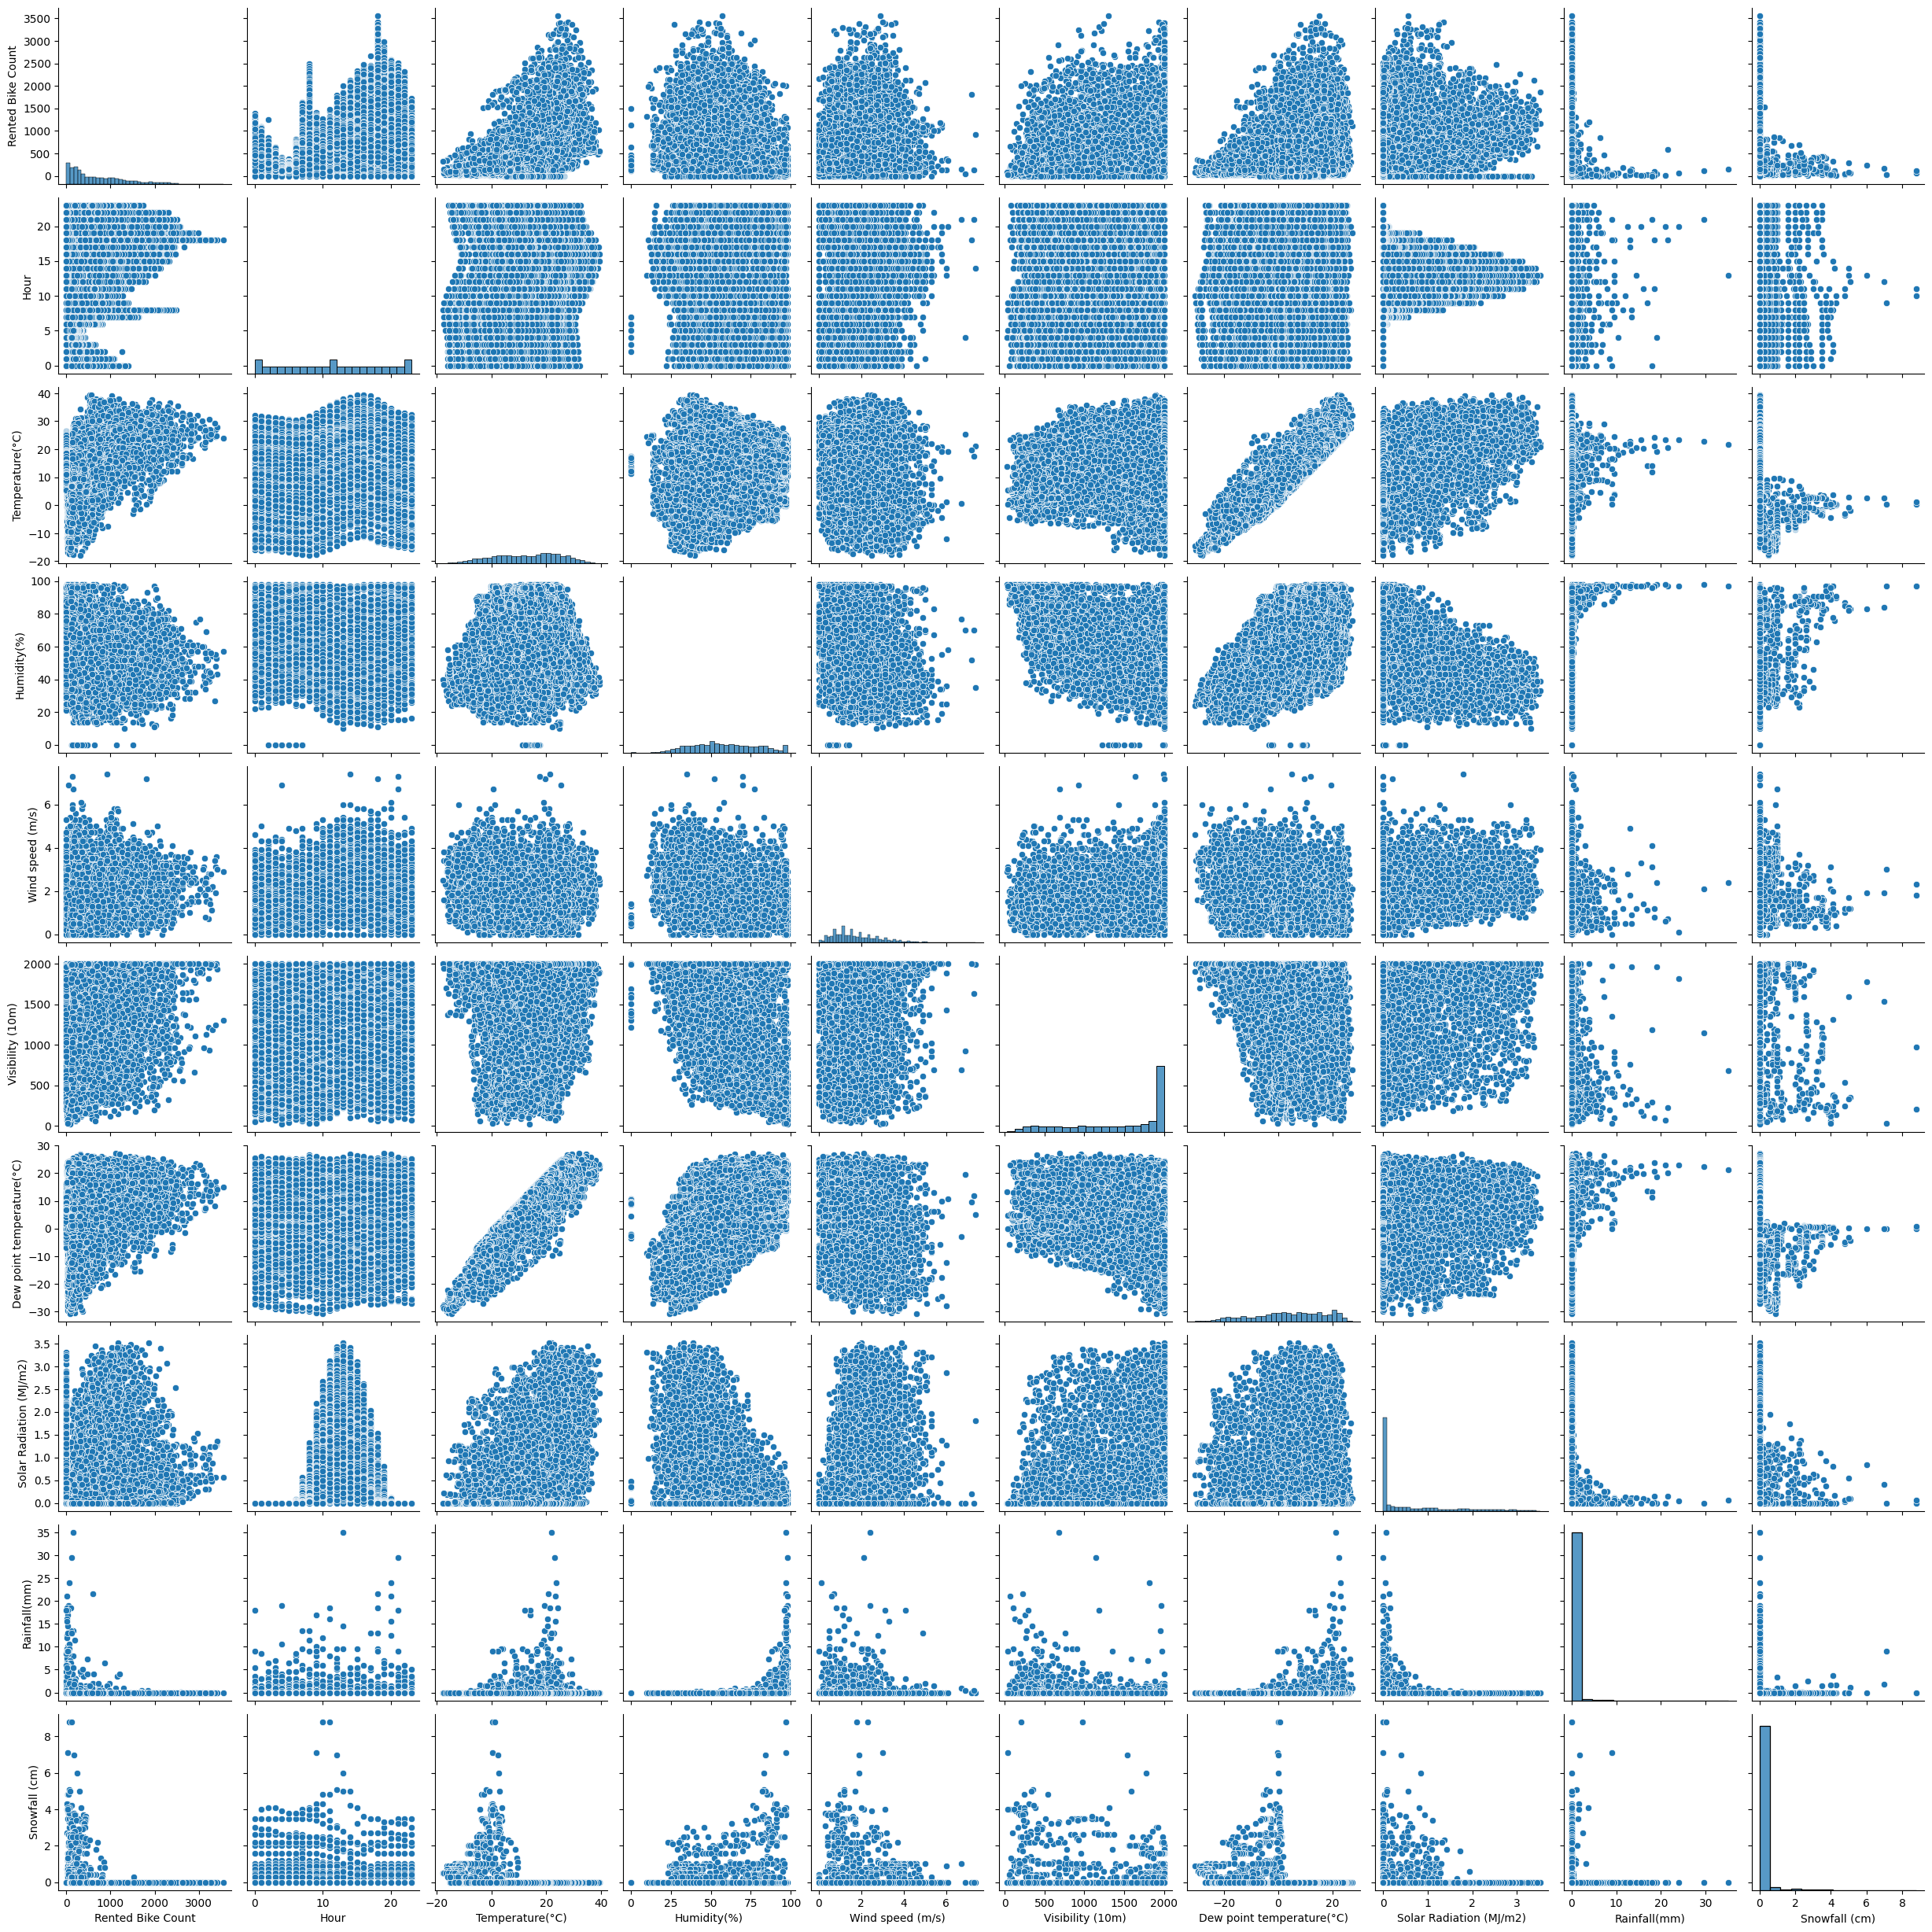

In [28]:
sns.pairplot(df)

In [29]:
cat_columns

['Seasons', 'Holiday', 'Functioning Day']

In [30]:
num_columns

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [32]:
df.Hour.value_counts()

Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64